# DBSCAN (Density-Based Spatial Clustering of Application with Noise)
- 밀도(데이터포인트의 간격) 기반 군집 알고리즘

**구성**

**장단점**
- 장점
    - 비구형 클러스터 탐지
    - 노이즈 데이터 처리
    - 비지도 학습 (클러스터 개수를 사전에 알 필요가 없음)
- 단점
    - 데이터 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능 저하
    - 특성 개수가 많으면 군집화 성능 저하 (고차원 데이터에서의 밀도 불균현)
    - 매개변수 민감성

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[ 0  0  0  1  0  0  0  1  1  0  0  1  0  1  0  0  0  0  1  0  1  1  0  0
  1  1  0  0  0  0  1  0  1  1  0  1  1  1  1  1  1  1  0  1  1  1  0  0
  1  0  0  1  0  1  0  0  1  1  0  1  0  1  1  0  0  1  1  0  1  0  1  1
  0  0  1  0  1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  1  1  0  1  1
  0  1  0  1  0  1  1  0  0  0  1  1  0  1  1  0  1  0  0  1  1  0  0  0
  1  0  0  0  1  0  1  1  0  0  1  1  0  1  0  0  0  0  0  1  1  1  0  1
  0  0  1  1  1  1  0  1  0  0  0  0  0  1  0  1  0  0  1  1  1  1  0  0
  0  1  1  0  0  1  1  0  1  1  0  1  0  1  0  0  1  0  0  0  1  1  1  0
  0  0  0  1  0  0  1  0  1  1  1  0  0  0  0  1  1  1  1  0  1  1  0  1
  1  0  0  1  1  0  0 -1  1  0  1  1  0  0  1  0  0  0  0  1  1  1  0  0
  0  0  0  1  0  1  0  0  0  1  1  1  1  1  1  1  1  1  0  1  1  1  0  1
  1  0  0  1  0  0  1  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  1  1
  0  1  1  0  1  0  1  0  1  1  0  1]


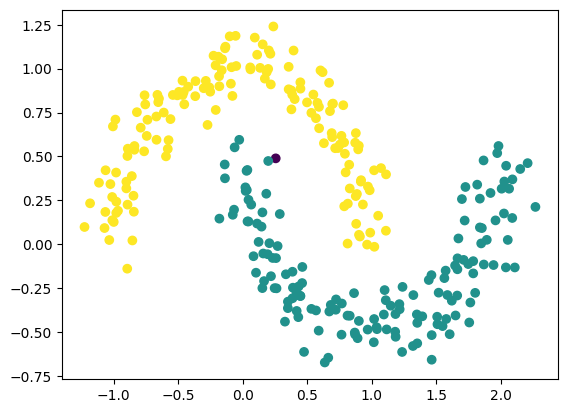

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

dbscna = DBSCAN(eps=0.2, min_samples=6)
dbscna.fit(X)
# print(dbscna.labels_)

plt.scatter(X[:, 0], X[:, 1], c=dbscna.labels_)
plt.show()

### [한번 해보기] iris 데이터셋에 DBSCAN 적용

species  cluster
0         0         49
         -1          1
1         1         46
          2          4
2         3         46
         -1          4
Name: count, dtype: int64


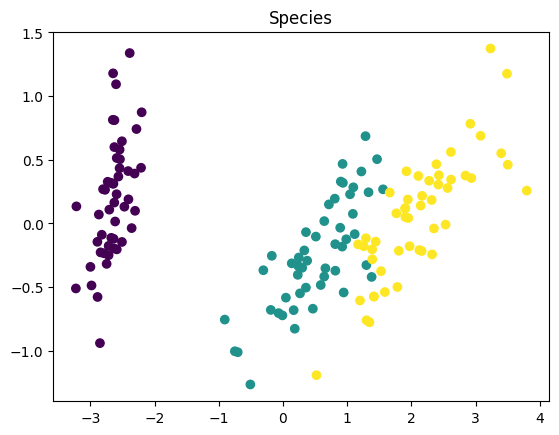

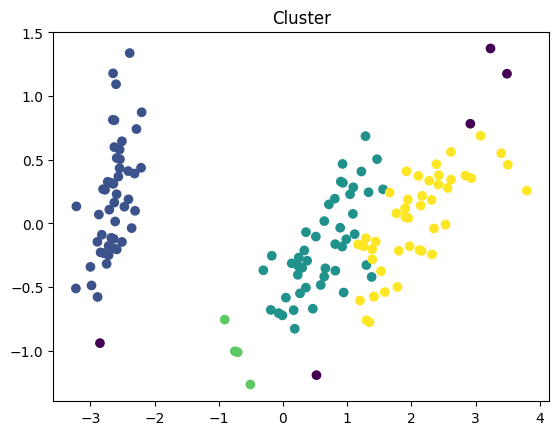

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 1. 데이터 로드 및 DataFrame 생성
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# 2. DBSCAN 적용 (epsilon 0.6, minPts 4로 지정)
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(iris_df)
# dbscan.fit_predict(iris_df)
# DBSCAN은 transform/predict 없음. 밀도계산이라서 그럼

# 3. cluster 결과를 df에 'cluster' 컬럼으로 추가
iris_df['cluster'] = dbscan.labels_

# 4. target과 cluster를 비교해 확인
print(iris_df.groupby('species')['cluster'].value_counts())

# 5. 실제 target class와 cluster를 기준으로 각각 시각화하여 비교 (시각화를 위한 차원축소 필요)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)
iris_df['pca1'] = iris_pca[:, 0]
iris_df['pca2'] = iris_pca[:, 1]

plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['species'])
plt.title('Species')
plt.show()

plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.title('Cluster')
plt.show()